In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from NBAData.features import *

### *basic outline:* team/player data -> assign rest days -> assign_postion (encode it) -> assign if starter (encode it) -> opp/team encode it -> prop features -> player prop matchup data

In [89]:
pd.set_option('display.max_columns', None)
# s21 = pd.read_csv('PLAYOFF_DATA/PLAYOFFS_21_FEATURES.csv')
# s22 = pd.read_csv('PLAYOFF_DATA/PLAYOFFS_22_FEATURES.csv')
s23 = pd.read_csv('PLAYOFF_DATA/PLAYOFFS_23_FEATURES.csv')
s24 = pd.read_csv('PLAYOFF_DATA/PLAYOFFS_24_FEATURES.csv')
s25 = pd.read_csv('PLAYOFF_DATA/PLAYOFFS_25_FEATURES.csv')
data = pd.concat([s25]).reset_index(drop=True)
data.drop(columns = ['Unnamed: 0'], inplace=True)
data.head()



,PLAYER_NAME,PLAYER_ID,MATCHUP,TEAM_ID,HOME_GAME,GAME_ID,GAME_DATE,WL,MIN,PTS,AST,REB,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,STL,BLK,TOV,PF,PLUS_MINUS,FANTASY_PTS,PointsPerShot,eFG,START_POSITION,OFF_RATING,DEF_RATING,NET_RATING,OREB_PCT,DREB_PCT,REB_PCT,AST_PCT,AST_TOV,USG_PCT,TS_PCT,E_PACE,PACE,PIE,PACE_PER40,TEAM_GAME_DATE,TEAM_MIN,TEAM_FGM,TEAM_FGA,TEAM_FG_PCT,TEAM_FG3M,TEAM_FG3A,TEAM_FG3_PCT,TEAM_FTM,TEAM_FTA,TEAM_FT_PCT,TEAM_OREB,TEAM_DREB,TEAM_REB,TEAM_AST,TEAM_STL,TEAM_BLK,TEAM_TOV,TEAM_PF,TEAM_PTS,OPP_DEF_RATING,OPP_STL,OPP_BLK,OPP_REB,OPP_FG_PCT,OPP_TEAM_ID,TEAM_OFF_RATING,TEAM_PACE,GAME_PACE,OPP_PACE,STARTING,USG_PCT_LAST_3,USG_PCT_LAST_5,USG_PCT_LAST_7,PTS_LAST_3,PTS_LAST_5,PTS_LAST_7,STD_PTS_LAST_3,STD_PTS_LAST_5,STD_PTS_LAST_7,PLAYER_HOME_AVG_PTS,PLAYER_AWAY_AVG_PTS,GUARD,FORWARD,CENTER,TEAM_BOS,TEAM_CLE,TEAM_DEN,TEAM_DET,TEAM_GSW,TEAM_HOU,TEAM_IND,TEAM_LAC,TEAM_LAL,TEAM_MEM,TEAM_MIA,TEAM_MIL,TEAM_MIN.1,TEAM_NYK,TEAM_OKC,TEAM_ORL,OPP_BOS,OPP_CLE,OPP_DEN,OPP_DET,OPP_GSW,OPP_HOU,OPP_IND,OPP_LAC,OPP_LAL,OPP_MEM,OPP_MIA,OPP_MIL,OPP_MIN,OPP_NYK,OPP_OKC,OPP_ORL
0,LeBron James,2544,LAL vs. MIN,1610612747,1,42400161,2025-04-19,L,36,19,3,5,8,18,0.444,1,5,0.200,2,2,1.000,1,4,2,3,4,0,-22,40.5,1.006,1.006,F,108.7,142.6,-34.0,0.029,0.138,0.078,0.158,0.75,0.278,0.503,90.65,90.70,0.099,75.59,"APR 19, 2025",240,33,83,0.398,15,41,0.366,14,16,0.875,13,25,38,15,5,4,13,10,95,105.508663,8.0,4.0,44.0,0.511628,1610612750,105.508663,90.04,89.72,89.40,1,0.28,0.28,0.28,19.00,19.00,19.00,NaN,NaN,NaN,19.00,NaN,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,LeBron James,2544,LAL vs. MIN,1610612747,1,42400162,2025-04-22,W,40,21,7,11,8,19,0.421,1,5,0.200,4,4,1.000,3,8,1,1,2,4,9,48.7,1.012,1.012,F,111.4,98.6,12.9,0.094,0.195,0.151,0.368,3.50,0.284,0.506,88.21,84.81,0.224,70.68,"APR 22, 2025",240,34,75,0.453,6,29,0.207,20,20,1.000,9,32,41,23,4,6,12,24,94,108.294931,6.0,2.0,34.0,0.379747,1610612750,108.294931,86.80,89.40,92.00,1,0.28,0.28,0.28,20.00,20.00,20.00,1.41,1.41,1.41,20.00,NaN,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,LeBron James,2544,LAL @ MIN,1610612747,0,42400163,2025-04-25,L,41,38,4,10,13,21,0.619,5,9,0.556,7,10,0.700,3,7,2,2,1,0,-10,67.0,1.496,1.496,F,109.9,117.9,-8.0,0.077,0.179,0.128,0.211,4.00,0.286,0.748,98.35,96.23,0.266,80.19,"APR 25, 2025",240,37,78,0.474,17,40,0.425,13,20,0.650,7,31,38,21,5,7,16,23,104,108.559499,10.0,5.0,38.0,0.483516,1610612750,108.559499,95.80,97.52,99.24,1,0.28,0.28,0.28,26.00,26.00,26.00,10.44,10.44,10.44,NaN,38.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,LeBron James,2544,LAL @ MIN,1610612747,0,42400164,2025-04-27,L,46,27,8,12,5,9,0.556,2,4,0.500,15,18,0.833,3,9,3,3,3,2,-4,68.4,1.596,1.596,F,119.1,125.0,-5.9,0.070,0.158,0.120,0.276,2.67,0.186,0.798,92.80,91.88,0.207,76.57,"APR 27, 2025",240,36,80,0.450,19,47,0.404,22,25,0.880,11,30,41,23,6,7,10,23,113,125.555556,8.0,2.0,49.0,0.422222,1610612750,125.555556,90.00,92.76,95.52,1,0.25,0.26,0.26,28.67,26.25,26.25,8.62,8.54,8.54,NaN,32.5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,LeBron James,2544,LAL vs. MIN,1610612747,1,42400165,2025-04-30,L,40,22,6,7,9,21,0.429,1,5,0.200,3,6,0.500,2,5,2,0,3,2,-14,42.4,0.931,0.931,F,93.8,112.7,-18.9,0.049,0.111,0.081,0.375,2.00,0.292,0.465,95.53,94.34,0.132,78.62,"APR 30, 2025",240,33,78,0.423,11,37,0.297,19,25,0.760,8,29,37,24,5,1,15,25,96,100.000000,8.0,5.0,54.0,0.404494,1610612750,100.000000,96.00,96.26,96.52,1,0.25,0.27,0.27,29.00,25.40,25.40,8.19,7.64,7.64,20.67,NaN,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [90]:
list(data.columns)

['PLAYER_NAME',
 'PLAYER_ID',
 'MATCHUP',
 'TEAM_ID',
 'HOME_GAME',
 'GAME_ID',
 'GAME_DATE',
 'WL',
 'MIN',
 'PTS',
 'AST',
 'REB',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PLUS_MINUS',
 'FANTASY_PTS',
 'PointsPerShot',
 'eFG',
 'START_POSITION',
 'OFF_RATING',
 'DEF_RATING',
 'NET_RATING',
 'OREB_PCT',
 'DREB_PCT',
 'REB_PCT',
 'AST_PCT',
 'AST_TOV',
 'USG_PCT',
 'TS_PCT',
 'E_PACE',
 'PACE',
 'PIE',
 'PACE_PER40',
 'TEAM_GAME_DATE',
 'TEAM_MIN',
 'TEAM_FGM',
 'TEAM_FGA',
 'TEAM_FG_PCT',
 'TEAM_FG3M',
 'TEAM_FG3A',
 'TEAM_FG3_PCT',
 'TEAM_FTM',
 'TEAM_FTA',
 'TEAM_FT_PCT',
 'TEAM_OREB',
 'TEAM_DREB',
 'TEAM_REB',
 'TEAM_AST',
 'TEAM_STL',
 'TEAM_BLK',
 'TEAM_TOV',
 'TEAM_PF',
 'TEAM_PTS',
 'OPP_DEF_RATING',
 'OPP_STL',
 'OPP_BLK',
 'OPP_REB',
 'OPP_FG_PCT',
 'OPP_TEAM_ID',
 'TEAM_OFF_RATING',
 'TEAM_PACE',
 'GAME_PACE',
 'OPP_PACE',
 'STARTING',
 'USG_PCT_LAST_3',
 'USG_PCT_LAST_5',
 'USG_PC

In [91]:
data.groupby('PLAYER_NAME')['PTS'].sum().sort_values(ascending=False).head(10)

PLAYER_NAME
Shai Gilgeous-Alexander    548
Jalen Brunson              530
Karl-Anthony Towns         386
Anthony Edwards            380
Pascal Siakam              371
Nikola Jokić               367
Jalen Williams             363
Tyrese Haliburton          332
Julius Randle              326
Jamal Murray               305
Name: PTS, dtype: int64

### Prepare data for training

In [109]:
features = [
    'MIN','FGA', 'FTA', 'FG3A','REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
    'OFF_RATING', 'DEF_RATING', 'NET_RATING',
    'AST_PCT', 'AST_TOV','USG_PCT', 'TS_PCT','PACE',
    'TEAM_FGA', 'TEAM_FG3A','TEAM_FTA',
    'TEAM_AST', 'TEAM_REB', 'TEAM_STL', 'TEAM_BLK', 'TEAM_TOV', 'TEAM_PF',
    'TEAM_OFF_RATING', 'TEAM_PACE',
    'GAME_PACE', 'OPP_PACE', 'OPP_DEF_RATING',
    'OPP_STL', 'OPP_BLK', 'OPP_REB', 'OPP_FG_PCT',
    'HOME_GAME', 'STARTING',
    'USG_PCT_LAST_3', 'USG_PCT_LAST_5', 'USG_PCT_LAST_7',
    'PTS_LAST_3', 'PTS_LAST_5', 'PTS_LAST_7',
    'STD_PTS_LAST_3', 'STD_PTS_LAST_5', 'STD_PTS_LAST_7',
    'PLAYER_HOME_AVG_PTS', 'PLAYER_AWAY_AVG_PTS',
    'GUARD', 'FORWARD', 'CENTER'
]

In [110]:
corr_matrix = data.corr(numeric_only=True)
target = corr_matrix['PTS'].sort_values(ascending=False).head(15)
target


PTS                    1.000000
FGM                    0.972738
FGA                    0.910042
FANTASY_PTS            0.909212
PLAYER_HOME_AVG_PTS    0.904982
PTS_LAST_3             0.887297
PLAYER_AWAY_AVG_PTS    0.882962
PTS_LAST_5             0.871846
PTS_LAST_7             0.865037
MIN                    0.768850
FTM                    0.709717
FTA                    0.701916
FG3M                   0.672507
FG3A                   0.664516
USG_PCT                0.607170
Name: PTS, dtype: float64

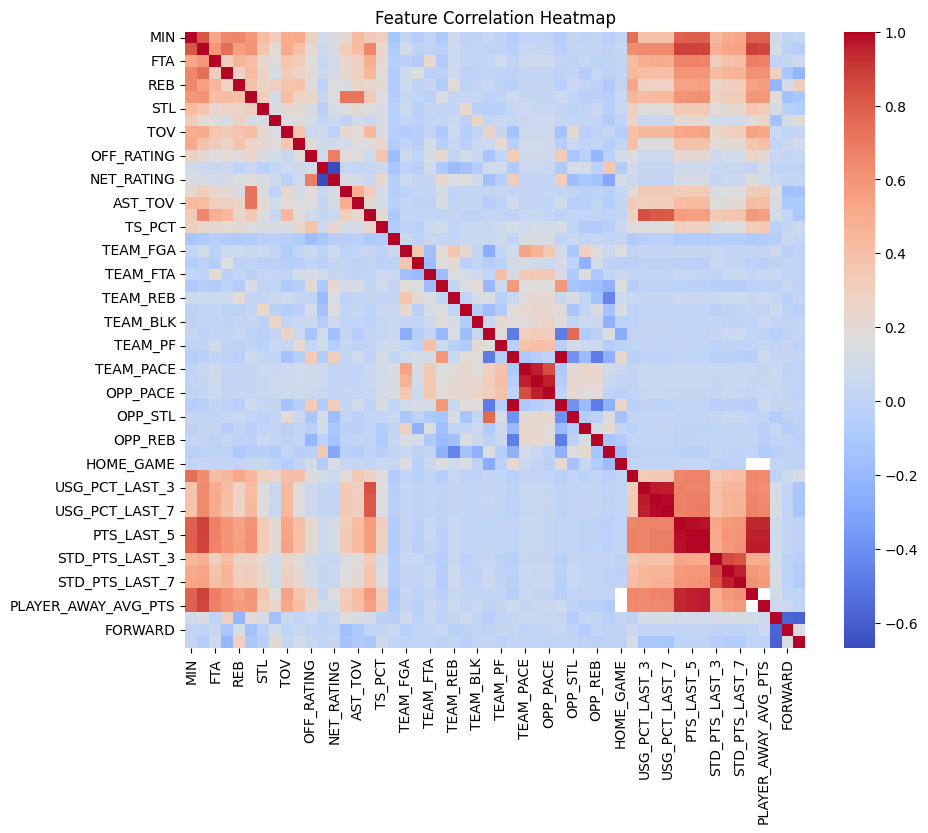

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data[features].corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### Train XGBoost model

In [112]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = data[features]
y = data['PTS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
XGB_model = xgb.XGBRegressor()
XGB_model.fit(X_train, y_train)
pred = XGB_model.predict(X_test)

print(f"R-squared: {round(r2_score(y_test, pred), 3)}")
print(f"Mean Absolute Error: {round(mean_absolute_error(y_test, pred), 3)}")
print(f"Mean Squared Error: {round(mean_squared_error(y_test, pred), 3)}")



R-squared: 0.982
Mean Absolute Error: 0.713
Mean Squared Error: 1.763


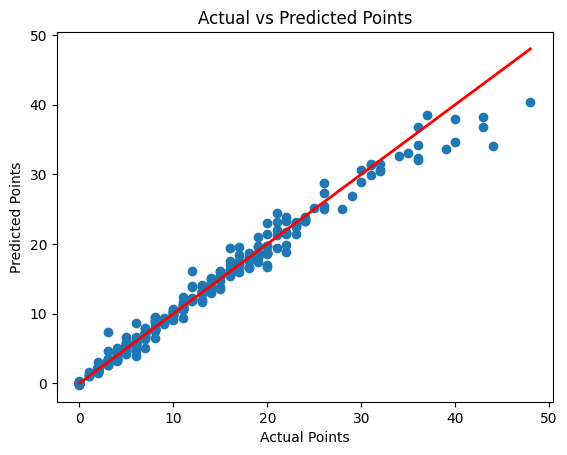

In [113]:
plt.scatter(y_test, pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted Points')
plt.show()


In [114]:
avg_features = [
    'PLAYER_NAME','MATCHUP','MIN','FGA', 'FTA', 'FG3A','REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
    'OFF_RATING', 'DEF_RATING', 'NET_RATING',
    'AST_PCT', 'AST_TOV','USG_PCT', 'TS_PCT','PACE',
    'TEAM_FGA', 'TEAM_FG3A','TEAM_FTA',
    'TEAM_AST', 'TEAM_REB', 'TEAM_STL', 'TEAM_BLK', 'TEAM_TOV', 'TEAM_PF',
    'TEAM_OFF_RATING', 'TEAM_PACE',
    'GAME_PACE', 'OPP_PACE', 'OPP_DEF_RATING',
    'OPP_STL', 'OPP_BLK', 'OPP_REB', 'OPP_FG_PCT',
    'HOME_GAME', 'STARTING',
    'USG_PCT_LAST_3', 'USG_PCT_LAST_5', 'USG_PCT_LAST_7',
    'PTS_LAST_3', 'PTS_LAST_5', 'PTS_LAST_7',
    'STD_PTS_LAST_3', 'STD_PTS_LAST_5', 'STD_PTS_LAST_7',
    'PLAYER_HOME_AVG_PTS', 'PLAYER_AWAY_AVG_PTS',
    'GUARD', 'FORWARD', 'CENTER'
]

df = pd.read_csv('PLAYOFF_DATA/PLAYOFFS_25_FEATURES.csv')
df.drop(columns = ['Unnamed: 0'], inplace=True)
df[avg_features]

,PLAYER_NAME,MATCHUP,MIN,FGA,FTA,FG3A,REB,AST,STL,BLK,TOV,PF,OFF_RATING,DEF_RATING,NET_RATING,AST_PCT,AST_TOV,USG_PCT,TS_PCT,PACE,TEAM_FGA,TEAM_FG3A,TEAM_FTA,TEAM_AST,TEAM_REB,TEAM_STL,TEAM_BLK,TEAM_TOV,TEAM_PF,TEAM_OFF_RATING,TEAM_PACE,GAME_PACE,OPP_PACE,OPP_DEF_RATING,OPP_STL,OPP_BLK,OPP_REB,OPP_FG_PCT,HOME_GAME,STARTING,USG_PCT_LAST_3,USG_PCT_LAST_5,USG_PCT_LAST_7,PTS_LAST_3,PTS_LAST_5,PTS_LAST_7,STD_PTS_LAST_3,STD_PTS_LAST_5,STD_PTS_LAST_7,PLAYER_HOME_AVG_PTS,PLAYER_AWAY_AVG_PTS,GUARD,FORWARD,CENTER
0,LeBron James,LAL vs. MIN,36,18,2,5,5,3,2,3,4,0,108.7,142.6,-34.0,0.158,0.75,0.278,0.503,90.70,83,41,16,15,38,5,4,13,10,105.508663,90.04,89.72,89.40,105.508663,8.0,4.0,44.0,0.511628,1,1,0.28,0.28,0.28,19.00,19.00,19.00,NaN,NaN,NaN,19.00,NaN,0,1,0
1,LeBron James,LAL vs. MIN,40,19,4,5,11,7,1,1,2,4,111.4,98.6,12.9,0.368,3.50,0.284,0.506,84.81,75,29,20,23,41,4,6,12,24,108.294931,86.80,89.40,92.00,108.294931,6.0,2.0,34.0,0.379747,1,1,0.28,0.28,0.28,20.00,20.00,20.00,1.41,1.41,1.41,20.00,NaN,0,1,0
2,LeBron James,LAL @ MIN,41,21,10,9,10,4,2,2,1,0,109.9,117.9,-8.0,0.211,4.00,0.286,0.748,96.23,78,40,20,21,38,5,7,16,23,108.559499,95.80,97.52,99.24,108.559499,10.0,5.0,38.0,0.483516,0,1,0.28,0.28,0.28,26.00,26.00,26.00,10.44,10.44,10.44,NaN,38.00,0,1,0
3,LeBron James,LAL @ MIN,46,9,18,4,12,8,3,3,3,2,119.1,125.0,-5.9,0.276,2.67,0.186,0.798,91.88,80,47,25,23,41,6,7,10,23,125.555556,90.00,92.76,95.52,125.555556,8.0,2.0,49.0,0.422222,0,1,0.25,0.26,0.26,28.67,26.25,26.25,8.62,8.54,8.54,NaN,32.50,0,1,0
4,LeBron James,LAL vs. MIN,40,21,6,5,7,6,2,0,3,2,93.8,112.7,-18.9,0.375,2.00,0.292,0.465,94.34,78,37,25,24,37,5,1,15,25,100.000000,96.00,96.26,96.52,100.000000,8.0,5.0,54.0,0.404494,1,1,0.25,0.27,0.27,29.00,25.40,25.40,8.19,7.64,7.64,20.67,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,Quinten Post,GSW @ MIN,6,0,0,0,1,0,0,0,0,0,138.5,28.6,109.9,0.000,0.00,0.000,0.000,102.32,87,42,15,26,51,10,2,12,18,113.013699,87.60,92.54,97.48,113.013699,7.0,6.0,41.0,0.395349,0,0,0.00,0.14,0.14,1.67,4.60,5.29,2.89,5.32,5.35,NaN,3.40,0,0,1
1688,Quinten Post,GSW @ MIN,3,0,0,0,0,0,0,0,0,0,0.0,216.7,-216.7,0.000,0.00,0.000,0.000,80.00,76,32,25,23,42,8,2,17,16,98.936170,94.00,95.40,96.80,98.936170,10.0,5.0,39.0,0.505747,0,1,0.00,0.06,0.11,0.00,2.00,3.57,0.00,2.74,4.72,NaN,2.83,0,0,1
1689,Quinten Post,GSW vs. MIN,3,0,0,0,0,0,0,0,0,1,40.0,160.0,-120.0,0.000,0.00,0.000,0.000,95.36,81,23,21,21,36,6,7,14,24,105.160451,92.24,94.24,96.24,105.160451,4.0,7.0,44.0,0.439024,1,0,0.00,0.00,0.09,0.00,1.00,3.29,0.00,2.24,4.89,5.00,NaN,0,0,1
1690,Quinten Post,GSW vs. MIN,5,4,0,2,2,1,0,0,0,1,146.2,38.5,107.7,0.200,0.00,0.286,0.625,134.68,85,27,33,18,38,10,1,15,25,109.430959,100.52,101.98,103.44,109.430959,9.0,5.0,38.0,0.493671,1,0,0.10,0.06,0.09,1.67,1.00,2.14,2.89,2.24,2.67,5.00,NaN,0,0,1


In [117]:
def getPlayerAVG(player, data):
    player_data = data[data['PLAYER_NAME'] == player]
    res = {}
    exclude = ['PLAYER_NAME','MATCHUP','OPP_PACE','OPP_DEF_RATING','OPP_STL','OPP_BLK','OPP_REB','OPP_FG_PCT','HOME_GAME','STARTING',
    'USG_PCT_LAST_3','USG_PCT_LAST_5','USG_PCT_LAST_7','PTS_LAST_3','PTS_LAST_5','PTS_LAST_7','STD_PTS_LAST_3','STD_PTS_LAST_5','STD_PTS_LAST_7','PLAYER_HOME_AVG_PTS','PLAYER_AWAY_AVG_PTS','GUARD','FORWARD','CENTER',
]
    for col in player_data[avg_features].columns:
        if col not in exclude:
            res[col] = round(player_data[col].mean(), 2)
    return res

def getOppAVG(team, data):
    pass
    

getPlayerAVG('Shai Gilgeous-Alexander', df)
    

{'MIN': np.float64(36.67),
 'FGA': np.float64(22.06),
 'FTA': np.float64(9.28),
 'FG3A': np.float64(5.0),
 'REB': np.float64(5.61),
 'AST': np.float64(6.78),
 'STL': np.float64(1.78),
 'BLK': np.float64(0.56),
 'TOV': np.float64(2.22),
 'PF': np.float64(2.67),
 'OFF_RATING': np.float64(116.86),
 'DEF_RATING': np.float64(102.99),
 'NET_RATING': np.float64(13.88),
 'AST_PCT': np.float64(0.32),
 'AST_TOV': np.float64(3.59),
 'USG_PCT': np.float64(0.32),
 'TS_PCT': np.float64(0.59),
 'PACE': np.float64(100.33),
 'TEAM_FGA': np.float64(91.89),
 'TEAM_FG3A': np.float64(36.94),
 'TEAM_FTA': np.float64(24.56),
 'TEAM_AST': np.float64(24.61),
 'TEAM_REB': np.float64(43.94),
 'TEAM_STL': np.float64(10.89),
 'TEAM_BLK': np.float64(5.5),
 'TEAM_TOV': np.float64(10.94),
 'TEAM_PF': np.float64(21.17),
 'TEAM_OFF_RATING': np.float64(114.53),
 'TEAM_PACE': np.float64(102.19),
 'GAME_PACE': np.float64(102.27)}